In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 4 # L of square grid

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


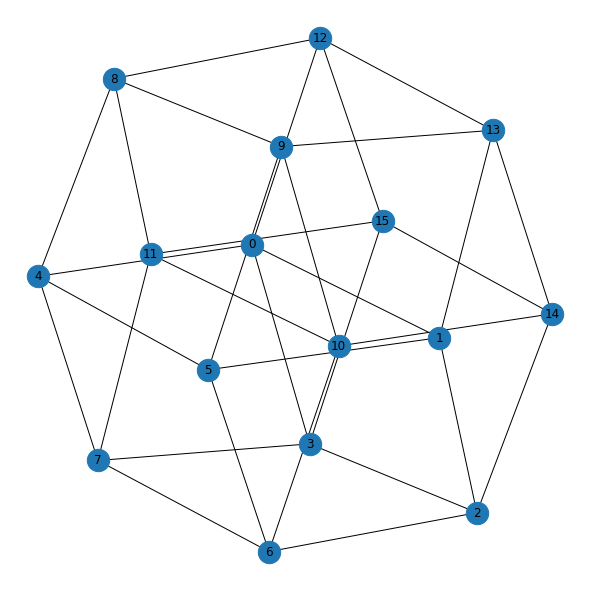

In [4]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

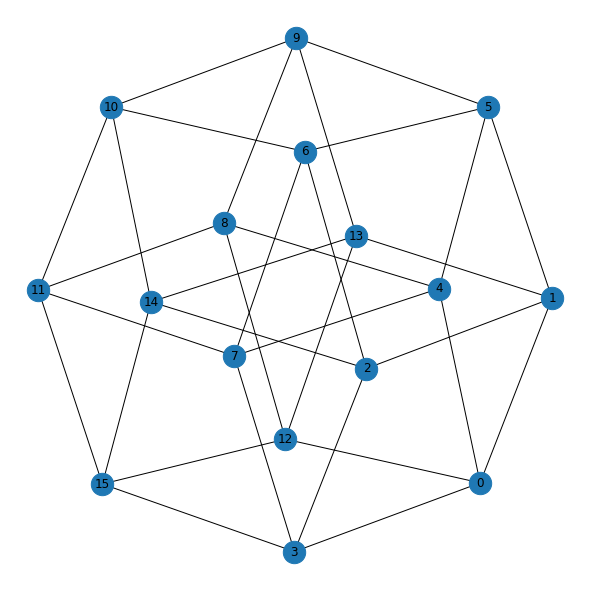

In [5]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)
J_interaction = graph_gen.reorder_graph(J_interaction, root = 0)
#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(0.1,2.1,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [6]:
tree = model.model(N, H, J, J_interaction)

In [7]:
import solvers
imp.reload(solvers)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.1, Fe: -7.033 Energy: -0.206 M: 0.0 S: 0.683-1.12e+02
beta: 0.2, Fe: -3.679 Energy: -0.456 M: 0.0 S: 0.644-58.6
beta: 0.3, Fe: -2.664 Energy: -0.844 M: 0.0 S: 0.54642.17
beta: 0.4, Fe: -2.275 Energy: -1.38 M: 3.45e-18 S: 0.3588
beta: 0.5, Fe: -2.138 Energy: -1.76 M: 0.0 S: 0.191 -33.1
beta: 0.6, Fe: -2.089 Energy: -1.91 M: 8.14e-15 S: 0.1094
beta: 0.7, Fe: -2.068 Energy: -1.96 M: 0.0 S: 0.0731-32.1
beta: 0.8, Fe: -2.056 Energy: -1.98 M: 0.0 S: 0.0573-32.1
beta: 0.9, Fe: -2.049 Energy: -1.99 M: 0.0 S: 0.05= -32.0
beta: 1.0, Fe: -2.044 Energy: -2.0 M: 0.0 S: 0.0465 -32.0
beta: 1.1, Fe: -2.040 Energy: -2.0 M: 0.0 S: 0.0449 -32.0
beta: 1.2, Fe: -2.036 Energy: -2.0 M: 0.0 S: 0.0441 -32.0
beta: 1.3, Fe: -2.033 Energy: -2.0 M: 0.0 S: 0.0437 -32.0
beta: 1.4, Fe: -2.031 Energy: -2.0 M: 0.0 S: 0.0435 -32.0
beta: 1.5, Fe: -2.029 Energy: -2.0 M: 0.0 S: 0.0434 -32.0
beta: 1.6, Fe: -2.027 Energy: -2.0 M: 0.0 S: 0.0434 -32.0
beta: 1.7, Fe: -2.025 Energy: -2.0 M: 0.0 S: 0.0433 -32.0
beta: 1.8,

In [8]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(tree, betas_fast, max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -7.032 std_fe: 3.20E-02 M: 0.007 S: 0.683 E: -0.204: 0.0295, B1 = 0.003
fe: -3.672 std_fe: 6.48E-02 M: 0.011 S: 0.648 E: -0.430: 0.0194, B1 = 0.010
fe: -2.641 std_fe: 9.68E-02 M: 0.009 S: 0.564 E: -0.759: 0.0299, B1 = 0.0038
fe: -2.245 std_fe: 7.73E-02 M: 0.007 S: 0.334 E: -1.411: 0.0251, B1 = 0.0028
fe: -2.125 std_fe: 3.93E-02 M: 0.006 S: 0.160 E: -1.806: 0.039, B1 = 0.00653
fe: -2.084 std_fe: 1.96E-02 M: 0.011 S: 0.092 E: -1.930: 0.00862, B1 = 0.016
fe: -2.066 std_fe: 9.39E-03 M: 0.008 S: 0.062 E: -1.977: 0.0755, B1 = -0.001
fe: -2.056 std_fe: 4.71E-03 M: 0.009 S: 0.054 E: -1.988: 0.0274, B1 = -0.000
fe: -2.049 std_fe: 4.59E-03 M: 0.019 S: 0.049 E: -1.995 0.0321, B1 = -0.00110
fe: -2.044 std_fe: 3.06E-03 M: 0.001 S: 0.045 E: -1.998 0.00213, B1 = -0.0021
fe: -2.039 std_fe: 1.92E-03 M: 0.002 S: 0.045 E: -1.9990.036, B1 = -0.001405
fe: -2.036 std_fe: 4.51E-03 M: 0.022 S: 0.044 E: -1.9990.032, B1 = -0.0043
fe: -2.033 std_fe: 4.97E-03 M: 0.001 S: 0.044 E: -1.9990.006, B1 = 0.00300
fe:

In [9]:
res_nn_z2 = solvers.nn_sol(tree, betas_fast, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -7.032 std_fe: 2.05E-02 M: 0.008 S: 0.683 E: -0.207: 0.0247, B1 = 0.040
fe: -3.677 std_fe: 3.25E-02 M: 0.006 S: 0.645 E: -0.453: 0.0269, B1 = 0.230
fe: -2.660 std_fe: 3.65E-02 M: 0.008 S: 0.549 E: -0.830: 0.0264, B1 = 0.768
fe: -2.272 std_fe: 2.90E-02 M: 0.005 S: 0.356 E: -1.382: 0.0143, B1 = 1.823
fe: -2.137 std_fe: 1.55E-02 M: 0.004 S: 0.189 E: -1.758: 0.0367, B1 = 3.159
fe: -2.089 std_fe: 7.20E-03 M: 0.004 S: 0.107 E: -1.911: 0.0549, B1 = 4.320
fe: -2.068 std_fe: 1.74E-03 M: 0.001 S: 0.072 E: -1.965: 0.0367, B1 = 5.303
fe: -2.056 std_fe: 9.26E-04 M: 0.016 S: 0.057 E: -1.985: 0.042, B1 = 6.2117
fe: -2.049 std_fe: 3.30E-04 M: 0.022 S: 0.050 E: -1.993 0.0178, B1 = 7.04973
fe: -2.044 std_fe: 1.85E-03 M: 0.013 S: 0.046 E: -1.9970.0339, B1 = 7.46151
fe: -2.040 std_fe: 1.34E-03 M: 0.007 S: 0.045 E: -1.9990.036, B1 = 7.915102
fe: -2.036 std_fe: 2.67E-03 M: 0.012 S: 0.045 E: -1.9990.058, B1 = 8.03843
fe: -2.033 std_fe: 4.74E-03 M: 0.010 S: 0.045 E: -1.9990.032, B1 = 8.14543
fe: -2.031 st

In [10]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(tree, betas_fast, val_rand=0.1)
res_bp["name"]="bp"

fe: -7.031, ener: -0.199, M: 0.000, iter 7
fe: -3.664, ener: -0.395, M: 0.000, iter 13
fe: -2.606, ener: -0.583, M: 0.000, iter 47
fe: -2.165, ener: -1.315, M: 0.736, iter 37
fe: -2.050, ener: -1.768, M: 0.929, iter 13
fe: -2.017, ener: -1.912, M: 0.975, iter 9
fe: -2.006, ener: -1.964, M: 0.990, iter 7
fe: -2.002, ener: -1.985, M: 0.996, iter 6
fe: -2.001, ener: -1.994, M: 0.998, iter 6
fe: -2.000, ener: -1.997, M: 0.999, iter 5
fe: -2.000, ener: -1.999, M: 1.000, iter 5
fe: -2.000, ener: -1.999, M: 1.000, iter 5
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 3
fe: -2.000, ener: -2.000, M: 1.000, iter 3
fe: -2.000, ener: -2.000, M: 1.000, iter 3


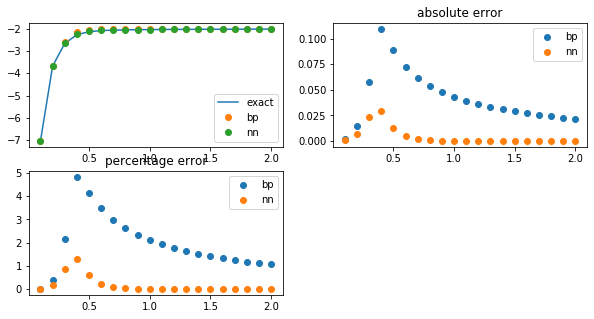

In [11]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

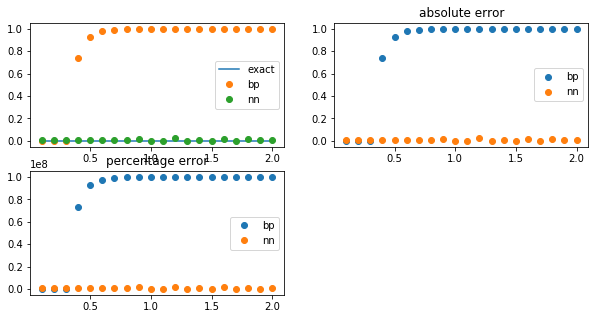

In [12]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn])
plt.show()

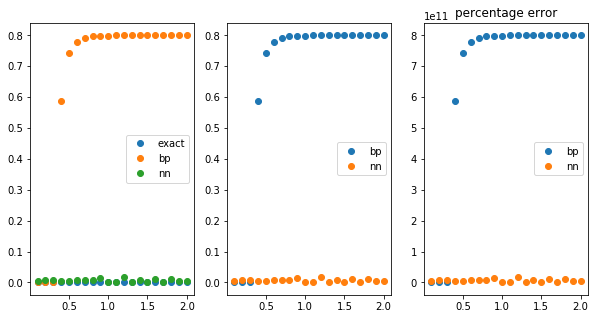

In [13]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn], init_=0)
plt.show()

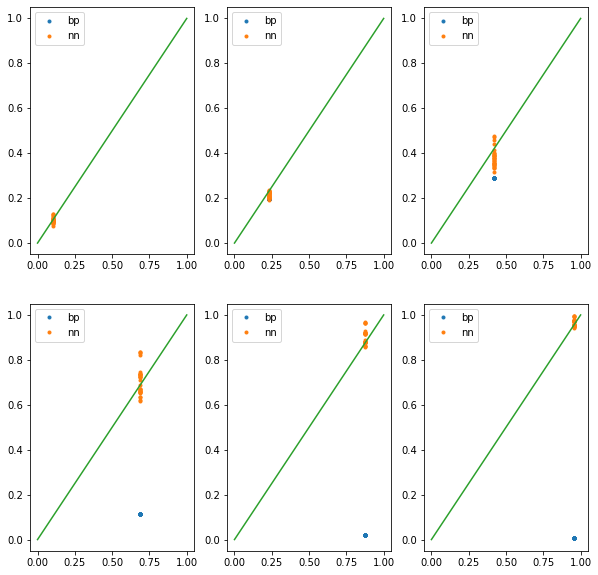

In [14]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas_fast[0:6], res_ex, [res_bp, res_nn], J_interaction)
plt.show()